Reproduces the tests over the MNIST dataset as on the paper

F. Pérez-Cruz, “Kullback-Leibler divergence estimation of continuous distributions,” in 2008 IEEE international symposium on information theory, 2008, pp. 1666–1670.

Used to validate our implementation.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from tqdm.notebook import tqdm

%load_ext autoreload
%autoreload 2
from soma.tests.kl import kl_two_samples

plt.style.use('dark_background')

In [2]:
dataset = mnist.load_data()

In [3]:
x, y = dataset[0]
x = x.astype(float)
threes = x[y == 3].reshape(-1, 28**2)
twos = x[y == 2].reshape(-1, 28**2)

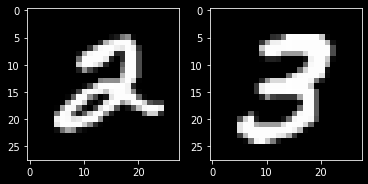

In [4]:
_, axes = plt.subplots(nrows=1, ncols=2)
axes[0].imshow(twos[0].reshape(28, 28), cmap='Greys_r')
axes[1].imshow(threes[0].reshape(28, 28), cmap='Greys_r')
plt.show()

In [5]:
Ns = [10, 20, 30, 100, 300, 500]
repeats = 100

In [6]:
means23 = np.zeros(len(Ns))
stds23 = np.zeros(len(Ns))
means33 = np.zeros(len(Ns))
stds33 = np.zeros(len(Ns))
for i, n in enumerate(tqdm(Ns)):
    r23 = []
    r33 = []
    for trial in range(repeats):
        sample_2 = twos[np.random.choice(len(twos), size=n)]
        sample_3 = threes[np.random.choice(len(threes), size=n)]
        sample_3_p = threes[np.random.choice(len(threes), size=n)]
        r23.append(kl_two_samples(sample_2, sample_3, k=min(n-1, 10)))
        r33.append(kl_two_samples(sample_3, sample_3_p, k=min(n-1, 10)))
    means23[i] = np.mean(r23)
    stds23[i] = np.std(r23)
    means33[i] = np.mean(r33)
    stds33[i] = np.std(r33)

  0%|          | 0/6 [00:00<?, ?it/s]

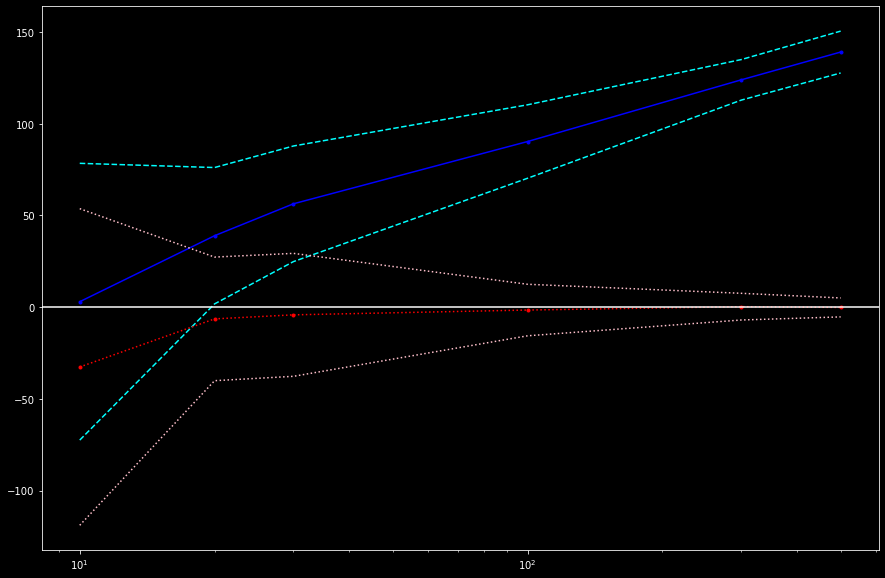

In [7]:
plt.figure(figsize=(15, 10))
plt.plot(Ns, means23, '.-', c='blue')
plt.plot(Ns, means23+2*stds23, '--', c='cyan')
plt.plot(Ns, means23-2*stds23, '--', c='cyan')
plt.plot(Ns, means33, '.:', c='red')
plt.plot(Ns, means33+2*stds33, ':', c='pink')
plt.plot(Ns, means33-2*stds33, ':', c='pink')
plt.axhline(0)
plt.xscale('log')
plt.show()